<div>
<img src="Tango.png" width="500"/>
</div>



## 1. <a id='toc1_'></a>[TANGO E2ES Nitro -- demo](#toc0_)

This is a demo of the Nitro version of the TANGO E2ES.


In this demo the **Jänschwalde plume scene** is showcased as it is being simulated and processed by the E2ES modules.



**Table of contents**<a id='toc0_'></a>    
- 1. [TANGO E2ES Nitro -- demo](#toc1_)    
- 2. [Reference](#toc2_)    
- 3. [Initialisation](#toc3_)    
  - 3.1. [Setup environment](#toc3_1_)    
  - 3.2. [Import TEDS modules](#toc3_2_)    
  - 3.3. [Load configuration file](#toc3_3_)    
- 4. [Calibration Key Data (CKD)](#toc4_)    
  - 4.1. [CKD config](#toc4_1_)    
  - 4.2. [CKD run](#toc4_2_)    
  - 4.3. [CKD visualisation](#toc4_3_)    
- 5. [Geometry Module (GM)](#toc5_)    
  - 5.1. [GM config](#toc5_1_)    
  - 5.2. [GM run](#toc5_2_)    
  - 5.3. [GM PAM](#toc5_3_)    
- 6. [Scene Generation Module (SGM)](#toc6_)    
  - 6.1. [SGM config](#toc6_1_)    
  - 6.2. [SGM run](#toc6_2_)    
  - 6.3. [SGM PAM](#toc6_3_)    
- 7. [Instrument Module (IM)](#toc7_)    
  - 7.1. [IM config](#toc7_1_)    
  - 7.2. [IM run](#toc7_2_)    
  - 7.3. [IM PAM](#toc7_3_)    
- 8. [L1A to L1B Processor](#toc8_)    
  - 8.1. [L1B config](#toc8_1_)    
  - 8.2. [L1B run](#toc8_2_)    
  - 8.3. [L1B PAM](#toc8_3_)    
- 9. [L1B to L2 Processor](#toc9_)    
  - 9.1. [L2 config](#toc9_1_)    
  - 9.2. [L2 run](#toc9_2_)    
  - 9.3. [L2 PAM](#toc9_3_)    
- 10. [Conclusions](#toc10_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 2. <a id='toc2_'></a>[Reference](#toc0_)
+ Laasner R., Landgraf, J., Borsdorff, T., Leune, B., van Amelrooy, E., van Hoek, M., Ludewig, A., Veefkind P.: Algorithm Theoretical Baseline Document for TANGO End-to-End Simulator, SRON-ESG-TN-2022-012, TANGO Mission Consortium, The Netherlands, 2024
+ Developers manual <a href="https://teds.rtfd.io/"> online document</a>

## 3. <a id='toc3_'></a>[Initialisation](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Setup environment](#toc0_)

Make sure the Jupyter notebook is started from the TANGO virtual environment, with the packages from `requirements.txt` installed. Use Python 3 ipykernel as kernel in the Jupyter notebook.

In [1]:
import sys
import os
import yaml
import subprocess
import copy


teds_path = "/usr/people/leune/tango/tango_e2e/teds/teds"

# add TEDS to Python path
os.chdir(teds_path)
sys.path.append("..")

# Set figure DPI for notebook to reduce figure size
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 70

### 3.2. <a id='toc3_2_'></a>[Import TEDS modules](#toc0_)

In [2]:
from teds.ckd.ckd_generation.ckd_generator_nitro import main as ckd_generator
from teds.gm import geometry_module
from teds.sgm.sgm_no2 import scene_generation_module_nitro
from teds.l1l2.l1bl2_no2 import l1bl2_no2
from teds.pam.pam import pam_nitro
from teds import run_E2E

### 3.3. <a id='toc3_3_'></a>[Load configuration file](#toc0_)
The configuration file `cfg/nitro/notebook.yaml` contains the configuration for all simulator modules.

Below we print the general I/O files.

In [3]:
cfg_file = '../cfg/nitro/notebook.yaml'
cfg = yaml.safe_load(open(cfg_file))

print(yaml.dump(cfg['io']))

base_dir: ../data/no2/notebook
binning_table: ../data/no2/ckd/binning_table_no2.nc
ckd: ../data/no2/notebook/ckd_nitro.nc
ckd_im: ../data/no2/notebook/ckd_nitro.nc
gm: geometry.nc
im_algo_output: im_l1x_{algo_name}.nc
l1a: l1a.nc
l1b: l1b.nc
l1b_algo_output: l1b_l1x_{algo_name}.nc
l2: l2.nc
sgm_atm: sgm_atmosphere.nc
sgm_atm_raw: sgm_atmosphere_raw.nc
sgm_rad: sgm_radiance.nc



## 4. <a id='toc4_'></a>[Calibration Key Data (CKD)](#toc0_)


### 4.1. <a id='toc4_1_'></a>[CKD config](#toc0_)
The following config is used for the CKD. It can be changed in-situ.


From TNO the following input is used: `TANGO_Nitro_V005_Nominal_Instrument_Model_Inputs_17102024.xlsx`


Sensitivity analysis on instrument design is possible by generating multiple CKD's and running each through the E2ES. RID ID: `CI-PATPFR-15`

In [8]:
print(yaml.dump(cfg['ckd']))

attributes:
  arrcamera: 3DCM800 Space Camera Head (3D Plus)
  conventions: CF-1.6
  creator_name: KNMI RDSW L01
  creator_url: knmi.nl
  institution: KNMI Royal Netherlands Meteorological Institute
  instrument: Nitro Instrument
  product_name: ckd_nitro.nc
  project: TANGO
  publisher_name: KNMI RDSW
  publisher_url: knmi.nl
  version: '0.0'
dark_current: 10
det_max_wl: 490
det_min_wl: 405
detector_pixel_size: 0.00345
dimensions:
  across_track: 100
  detector_column: 3008
  detector_row: 4112
  lbl_samples: 2141
  number_of_views: 1
  single_double: 1
  vector: 3
etendue: 0.0349
fov: 3.44
gain: 43.91735
image_extent_act: 9.9
image_extent_spec: 5.77
lbl_max_wl: 502
lbl_min_wl: 395
n_van_cittert: 2
noise_conversion_gain: 0.023
paths:
  ckd_nitro: ../data/no2/notebook/ckd_nitro.nc
  dir_external: ./ckd/ckd_generation/data_external/
  dir_nitro: ./ckd/ckd_generation/nitro_ckds
  im_inputs_tno: ./ckd/ckd_generation/data_external/TANGO_Nitro_V005_Nominal_Instrument_Model_Inputs_17102024.x

### 4.2. <a id='toc4_2_'></a>[CKD run](#toc0_)

In [6]:
ckd_generator(cfg['ckd'])

Generating pixel_mask...
Generating line_of_sight...
Generating row_index...
Generating wavelength...
Generating wave_map...
Generating n...
Generating g...
Generating dispersion...
Generating transmission...
rcc = 4.22e+12, new radiometric = 7.05e+10
Generating radiometric...
Generating x0...
Generating w...
Generating n...
Generating kernel_rows...
Generating kernel_cols...
Generating kernel_fft_sizes...
Generating kernel_fft_re...
Generating kernel_fft_im...
Generating eta...
Generating weights...
Generating edges...
Generating offset...
Generating current...
Generating quantum_efficiency...
Generating prnu...
[done] >> ../data/no2/notebook/ckd_nitro.nc created


### 4.3. <a id='toc4_3_'></a>[CKD visualisation](#toc0_)

In [9]:
%%bash
ncdump -h ../data/no2/notebook/ckd_nitro.nc

netcdf ckd_nitro {
dimensions:
	detector_row = 4112 ;
	detector_column = 3008 ;
	across_track = 100 ;
	lbl_samples = 2141 ;
	vector = 3 ;
	number_of_views = 1 ;
	single_double = 1 ;
variables:
	ubyte pixel_mask(detector_row, detector_column) ;
		pixel_mask:long_name = "detector pixel mask" ;
		pixel_mask:valid_range = 0b, 1b ;
		pixel_mask:flag_values = 0b, 1b ;
		pixel_mask:flag_meanings = "0:good, 1:bad" ;

// global attributes:
		:institution = "KNMI Royal Netherlands Meteorological Institute" ;
		:date_created = "2025-02-18" ;
		:conventions = "CF-1.6" ;
		:project = "TANGO" ;
		:instrument = "Nitro Instrument" ;
		:product_name = "ckd_nitro.nc" ;
		:version = "0.0" ;
		:creator_name = "KNMI RDSW L01" ;
		:creator_url = "knmi.nl" ;
		:publisher_name = "KNMI RDSW" ;
		:publisher_url = "knmi.nl" ;
		:arrcamera = "3DCM800 Space Camera Head (3D Plus)" ;

group: swath {
  variables:
  	ubyte line_of_sight(across_track, vector) ;
  		line_of_sight:long_name = "line of sight vectors" ;
  

  		weights:units = "1" ;
  	double edges(kernel, edges_of_box) ;
  		edges:long_name = "distances of subimage edges from the detector edges" ;
  } // group stray

group: dark {
  variables:
  	double offset(detector_row, detector_column) ;
  		offset:long_name = "detector dark offset" ;
  		offset:units = "counts" ;
  		offset:comment = "Placeholder, no data available" ;
  	double current(detector_row, detector_column) ;
  		current:long_name = "detector dark current" ;
  		current:units = "counts/s" ;
  		current:comment = "Not temperature dependent" ;
  } // group dark

group: prnu {
  variables:
  	double quantum_efficiency(detector_row, detector_column) ;
  		quantum_efficiency:comment = "Generated using wavelength map and QE data from TNO" ;
  	double prnu(detector_row, detector_column) ;
  		prnu:long_name = "pixel response non-uniformity" ;
  		prnu:comment = "PRNU with Quantum Efficiency" ;
  } // group prnu
}


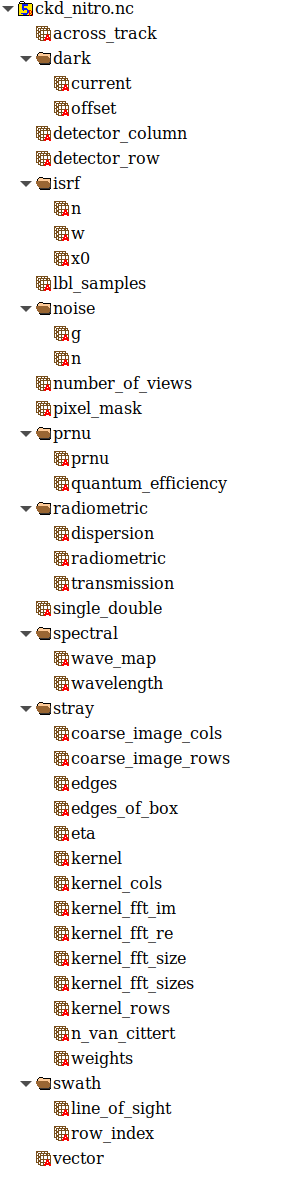

## 5. <a id='toc5_'></a>[Geometry Module (GM)](#toc0_)

### 5.1. <a id='toc5_1_'></a>[GM config](#toc0_)
The following config is used for the GM. It can be changed in-situ.

In [7]:
cfg_gm = run_E2E.get_specific_config(cfg,'gm')
print(yaml.dump(cfg_gm))

header:
  file_name: full_config.yaml
  version: '0.000'
io:
  gm: ../data/no2/notebook/geometry.nc
orbit:
  arg_perigee: 0.0
  drag_coeff: 0.0
  eccentricity: 0.0
  epoch: 2022-08-12 12:00:00
  ltan: 13.823
  mean_anomaly: 0.0
  mean_motion_dot: 0.0
  propagation_duration: 1.67
  sat_height: 500.0
profile: orbit
sensors:
  sensor_00__00:
    end_time: 13.8
    integration_time: 0.04
    n_ground_pixels: 100
    pitch: 0.0
    roll: 0.0
    start_time: 13.73
    swath_width: 30.0
    yaw: 0.0



### 5.2. <a id='toc5_2_'></a>[GM run](#toc0_)

In [17]:
geometry_module(cfg_gm)

14:05:25 : teds : gm: INFO : propagate orbit...
14:05:29 : teds : gm: INFO : defining sensor sensor_00__00
14:05:29 : teds : gm: INFO : compute the ground pixels (gpx)
14:05:29 : teds : libOrbSim: INFO :     satellite position
14:05:29 : teds : libOrbSim: INFO :     satellite ground points
14:05:29 : teds : libOrbSim: INFO :     viewing angles
14:05:29 : teds : libOrbSim: INFO :     solar angles
14:05:29 : teds : gm: INFO : Writing geometry data to ../data/no2/notebook/geometry.nc.
14:05:29 : teds : gm: INFO : =>gm calculation finished successfully. 


### 5.3. <a id='toc5_3_'></a>[GM PAM](#toc0_)

14:19:47 : teds : pam: INFO : Starting PAM
14:19:47 : teds : pam: INFO : Plotting GM


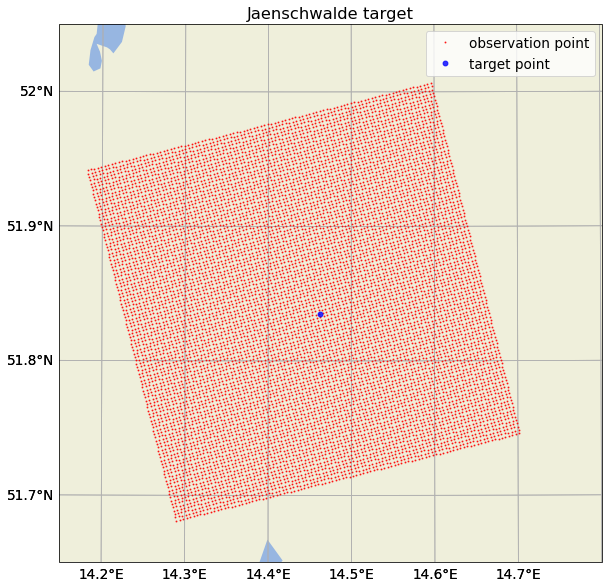

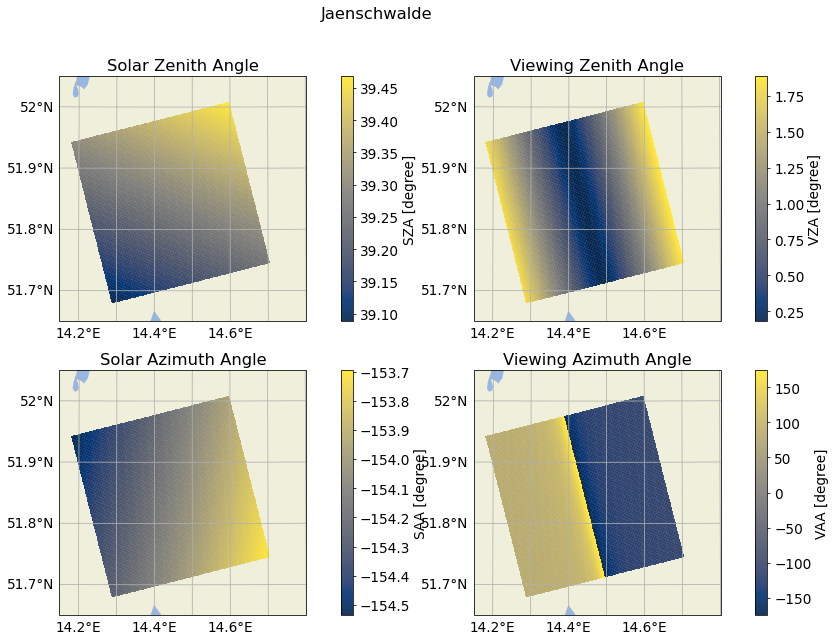

14:19:56 : teds : pam: INFO : Finished PAM


In [5]:
cfg_gm_pam = copy.deepcopy(run_E2E.get_specific_config(cfg,'pam'))
cfg_gm_pam['gm']['run'] = True
pam_nitro(cfg_gm_pam)

## 6. <a id='toc6_'></a>[Scene Generation Module (SGM)](#toc0_)

### 6.1. <a id='toc6_1_'></a>[SGM config](#toc0_)
The following config is used for the SGM. It can be changed in-situ.

In [5]:
cfg_sgm = run_E2E.get_specific_config(cfg,'sgm')
print(yaml.dump(cfg_sgm))

atm:
  afgl:
    dzlay: 1000
    nlay: 30
  cams_datetime: 2023-05-23 09:30:00
  cloud:
    act:
      start: 0
      stop: 50
    alt:
      start: 0
      stop: 5
    cloud_bottom_pressure: 900
    cloud_fraction: 1.0
    cloud_optical_thickness: 10.0
    cloud_top_pressure: 800
    use: true
  gases:
  - no2
  - o3
  microHH:
    gases:
    - no2
    use: true
  type: cams
  use_dem: true
header:
  file_name: full_config.yaml
  version: '0.000'
io:
  afgl: ../data/no2/prof.AFGL.US.std
  albedo: ../data/no2/albedo_jaenschwalde.nc
  cams: ../data/cams/cams_global_forecast_20230523.nc
  dem: ../data/no2/dem.nc
  disamar_cfg_template: ../cfg/nitro/disamar_config_sim.in_template
  disamar_exe: ../data/no2/disamar/Disamar_old.exe
  gm: ../data/no2/notebook/geometry.nc
  microHH_filesuffix: src3_20180523_0930
  microHH_folder: ../data/no2/microHH/Jaenschwalde/
  sgm_atm: ../data/no2/notebook/sgm_atmosphere.nc
  sgm_atm_raw: ../data/no2/notebook/sgm_atmosphere_raw.nc
  sgm_rad: ../data/no2/

### 6.2. <a id='toc6_2_'></a>[SGM run](#toc0_)

In [11]:
# set library path for ifort, specific for KNMI workstation
# for using ifort DISAMAR
os.environ['LD_LIBRARY_PATH'] = '/opt/intel/oneapi/compiler/2022.1.0/linux/lib:/opt/intel/oneapi/compiler/2022.1.0/linux/lib/x64:/opt/intel/oneapi/compiler/2022.1.0/linux/compiler/lib/intel64_lin'

scene_generation_module_nitro(cfg_sgm)

### 6.3. <a id='toc6_3_'></a>[SGM PAM](#toc0_)

14:20:04 : teds : pam: INFO : Starting PAM
14:20:04 : teds : pam: INFO : Plotting SGM geo


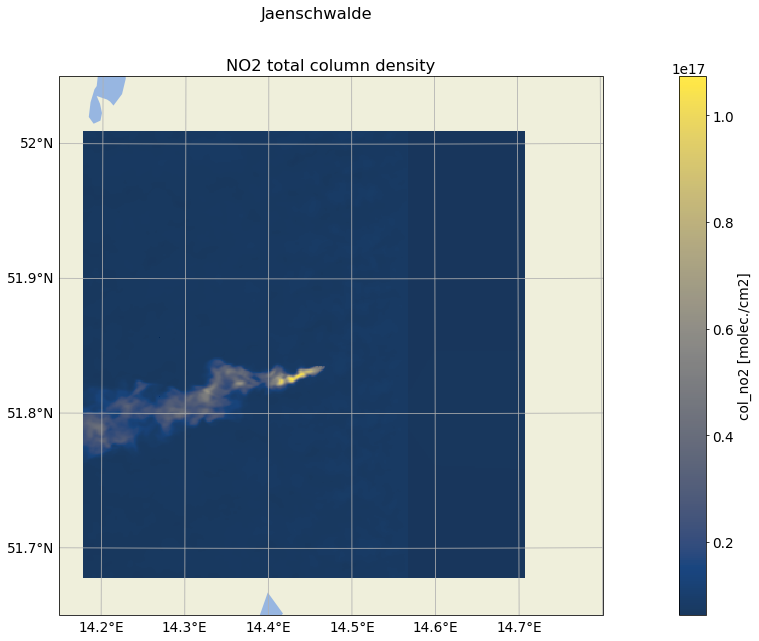

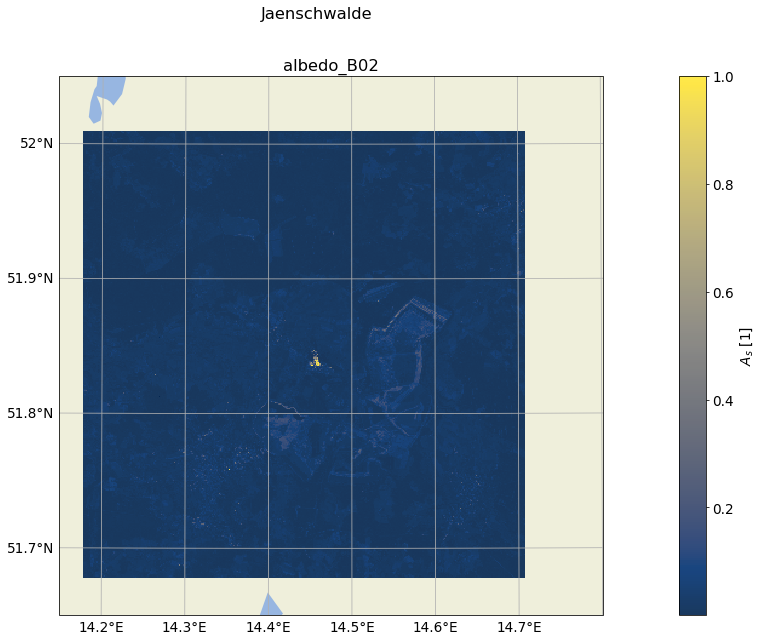

/net/pc230061/nobackup/users/leune/venv/tango/lib64/python3.12/site-packages/cartopy/mpl/geoaxes.py:525: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)


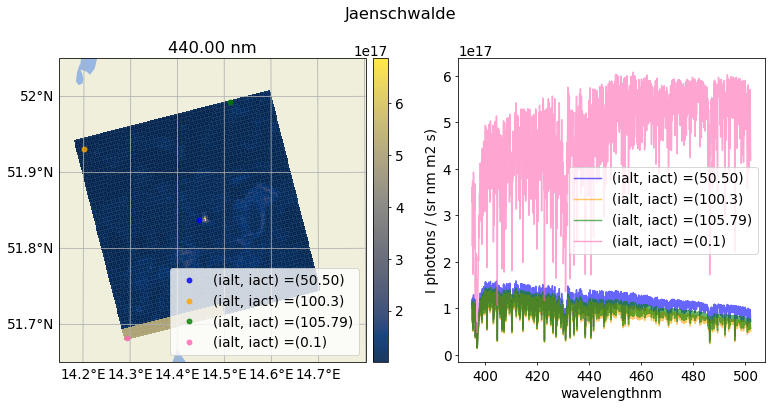

14:20:08 : teds : pam: INFO : Finished PAM


In [6]:
cfg_sgm_pam = copy.deepcopy(run_E2E.get_specific_config(cfg,'pam'))
cfg_sgm_pam['sgm']['run'] = True
pam_nitro(cfg_sgm_pam)

## 7. <a id='toc7_'></a>[Instrument Module (IM)](#toc0_)

### 7.1. <a id='toc7_1_'></a>[IM config](#toc0_)
The following config is used for the IM. It can be changed in-situ.

In [6]:
cfg_im = copy.deepcopy(run_E2E.get_specific_config(cfg,'im'))
print(yaml.dump(cfg_im))

im_config_file = f"{os.path.dirname(cfg_file)}/im_config_temp.yaml"
with open(im_config_file,'w') as outfile:
    yaml.dump(cfg_im, outfile)

detector:
  binning_table_id: 1
  exposure_time: 0.021
  nr_coadditions: 1
do_python: false
header:
  file_name: full_config.yaml
  version: '0.000'
instrument: nitro
io:
  binning_table: ../data/no2/ckd/binning_table_no2.nc
  ckd: ../data/no2/ckd/ckd_nitro.nc
  geometry: ../data/no2/notebook/geometry.nc
  l1a: ../data/no2/notebook/l1a.nc
  sgm: ../data/no2/notebook/sgm_radiance.nc
processing_version: 0.0
proctable:
  algo_list: algos_im
  file: ../cfg/nitro/proctable.yaml



### 7.2. <a id='toc7_2_'></a>[IM run](#toc0_)

In [8]:
subprocess.run(["../build/teds/im/tango_im.x", im_config_file], check=True)

NITRO DRIVER
##########################
# Tango instrument model #
##########################
Version                 : 0.0.1
Commit hash             : d60aeae2
Date and timezone       : 2025 February 17 Mon UTC+0100
Contacts                : raullaasner@gmail.com
                          bitbucket.org/sron_earth/teds/issues (request permission)
Host system             : Linux-6.12.10-100.fc40.x86_64
Executable location     : /usr/people/leune/tango/tango_e2e/teds/build/teds/im/tango_l1b
C++ compiler            : /usr/lib64/ccache/g++
C++ compiler flags      : -O3 -DNDEBUG
Number of threads       : 20
Binning table file      : ../data/no2/ckd/binning_table_no2.nc

##############################
# Reading CKD and input data #
##############################
[15:00:10]  Reading dark CKD
[15:00:11]  Reading noise CKD
[15:00:12]  Reading dark CKD
[15:00:12]  Reading stray light CKD
[15:00:13]  Reading swath CKD
[15:00:13]  Reading spectral CKD
[15:00:13]  Reading radiometric CKD
[15:00:14]

CompletedProcess(args=['../build/teds/im/tango_im.x', '../cfg/nitro/im_config_temp.yaml'], returncode=0)

### 7.3. <a id='toc7_3_'></a>[IM PAM](#toc0_)

15:06:57 : teds : pam: INFO : Starting PAM
15:06:57 : teds : pam: INFO : Plotting L1A


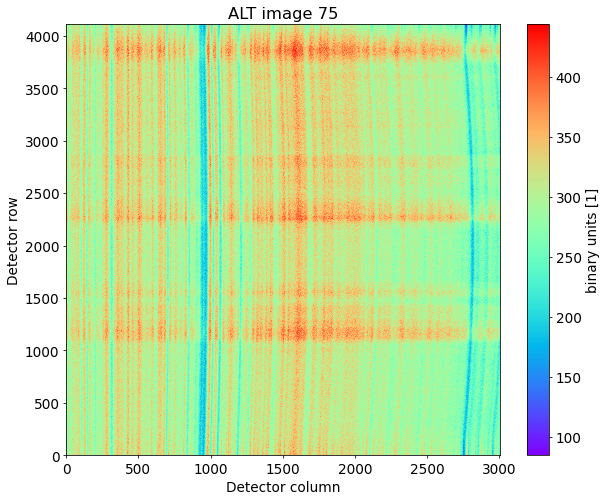

15:07:02 : teds : pam: INFO : Finished PAM


In [9]:
cfg_im_pam = copy.deepcopy(run_E2E.get_specific_config(cfg,'pam'))
cfg_im_pam['im']['run'] = True
cfg_im_pam['im']['ialt'] = 75
pam_nitro(cfg_im_pam)

## 8. <a id='toc8_'></a>[L1A to L1B Processor](#toc0_)

### 8.1. <a id='toc8_1_'></a>[L1B config](#toc0_)
The following config is used for the L1B processor. It can be changed in-situ.

In [10]:
cfg_l1b = copy.deepcopy(run_E2E.get_specific_config(cfg,'l1al1b'))

print(yaml.dump(cfg_l1b))

l1b_config_file = f"{os.path.dirname(cfg_file)}/l1b_config_temp.yaml"
with open(l1b_config_file,'w') as outfile:
    yaml.dump(cfg_l1b, outfile)

do_python: false
header:
  file_name: full_config.yaml
  version: '0.000'
instrument: nitro
io:
  binning_table: ../data/no2/ckd/binning_table_no2.nc
  ckd: ../data/no2/ckd/ckd_nitro.nc
  geometry: ../data/no2/notebook/geometry.nc
  l1a: ../data/no2/notebook/l1a.nc
  l1b: ../data/no2/notebook/l1b.nc
processing_version: 0.0
proctable:
  algo_list: algos_l1b
  file: ../cfg/nitro/proctable.yaml



### 8.2. <a id='toc8_2_'></a>[L1B run](#toc0_)

In [11]:
subprocess.run(["../build/teds/l1al1b/tango_l1b.x", l1b_config_file], check=True)

NITRO DRIVER
#######################
# Tango L1B processor #
#######################
Version                 : 0.0.1
Commit hash             : d60aeae2
Date and timezone       : 2025 February 17 Mon UTC+0100
Contacts                : raullaasner@gmail.com
                          bitbucket.org/sron_earth/teds/issues (request permission)
Host system             : Linux-6.12.10-100.fc40.x86_64
Executable location     : /usr/people/leune/tango/tango_e2e/teds/build/teds/l1al1b/tango_l1b
C++ compiler            : /usr/lib64/ccache/g++
C++ compiler flags      : -O3 -DNDEBUG
Number of threads       : 20
Linking against         : /usr/lib64/libnetcdf_c++4.so
                          /usr/lib64/libnetcdf.so
                          /usr/lib64/liblapack.so
                          OpenMP::OpenMP_CXX
                          /usr/people/leune/tango/tango_e2e/teds/build/_deps/spdlog-src/include
                          /usr/people/leune/tango/tango_e2e/teds/build/_deps/yaml-cpp-src/include
 

CompletedProcess(args=['../build/teds/l1al1b/tango_l1b.x', '../cfg/nitro/l1b_config_temp.yaml'], returncode=0)

### 8.3. <a id='toc8_3_'></a>[L1B PAM](#toc0_)

18:01:41 : teds : pam: INFO : Starting PAM
18:01:41 : teds : pam: INFO : Plotting L1B


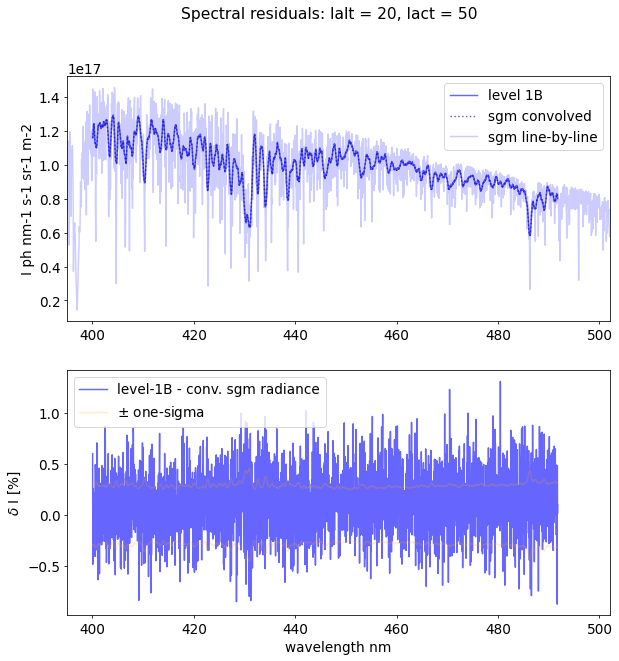

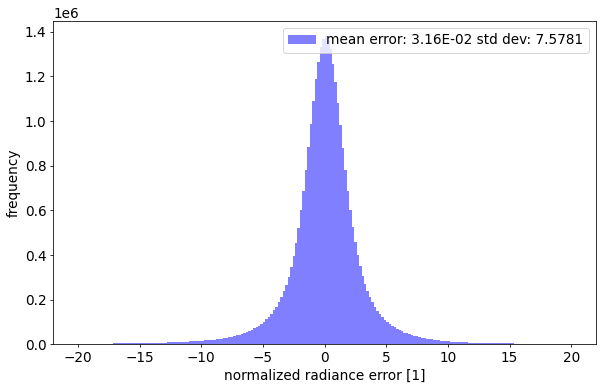

18:01:45 : teds : pam: INFO : Finished PAM


In [5]:
cfg_l1b_pam = copy.deepcopy(run_E2E.get_specific_config(cfg,'pam'))
cfg_l1b_pam['l1b']['run'] = True
cfg_l1b_pam['l1b']['ialt'] = 20
cfg_l1b_pam['l1b']['iact'] = 50
cfg_l1b_pam['l1b']['isrf'] = 'ckd' # Gaussian or CKD
cfg_l1b_pam['l1b']['isrf_file'] = './ckd/ckd_generation/data_external/Nominal_ISRF_dataset_17102024.xlsx'
cfg_l1b_pam['l1b']['load_rad_conv'] = True # load previously convolved ISRF sgm rad
cfg_l1b_pam['l1b']['plot_options'] = ['residuals', 'histo'] # slow! due to ISRF convolving
# cfg_l1b_pam['l1b']['plot_options'] = ['spectrum'] # fast

pam_nitro(cfg_l1b_pam)

## 9. <a id='toc9_'></a>[L1B to L2 Processor](#toc0_)

### 9.1. <a id='toc9_1_'></a>[L2 config](#toc0_)
The following config is used for the L2 processor. It can be changed in-situ.

In [21]:
cfg_l2 = copy.deepcopy(run_E2E.get_specific_config(cfg,'l1l2'))
print(yaml.dump(cfg_l2))

LUT_NN_file: ../data/no2/LUT_NN_combined_20240429.nc
convolve_irr: ISRF
convolve_rad: ISRF
debug:
  log: false
  plot: false
export_spectra: false
gaussian_fwhm: 0.6
header:
  file_name: full_config.yaml
  version: '0.000'
io:
  gm: ../data/no2/notebook/geometry.nc
  l1b: ../data/no2/notebook/l1b.nc
  l2: ../data/no2/notebook/l2.nc
  sgm_atm: ../data/no2/notebook/sgm_atmosphere.nc
  sgm_rad: ../data/no2/notebook/sgm_radiance.nc
irr_from_sgm: true
isrf_file: ./ckd/ckd_generation/data_external/Nominal_ISRF_dataset_17102024.xlsx
no2:
  convergence_threshold: 1.0
  fit_window:
  - 405.0
  - 465.0
  intensity_coefs: 0
  intensity_scaling_factor: 1.0
  max_iterations: 8
  max_outliers: 10
  polynomial_coefs: 6
  prior:
    doas:
      C0:
      - 1.0
      - 1.0
      C1:
      - 0.125
      - 0.125
      C2:
      - 0.015625
      - 0.015625
      C3:
      - 0.015625
      - 0.015625
      Cring:
      - 0.06
      - 0.2
      Dring:
      - 0.06
      - 0.2
      H20liq:
      - 0.0
     

### 9.2. <a id='toc9_2_'></a>[L2 run](#toc0_)

In [22]:
l1bl2_no2(cfg_l2)

14:55:41 : teds : libConv: INFO : Convolving irradiance from SGM with ISRF
14:55:55 : teds : libDOAS: INFO : === Start IFDOE processing NO2
14:55:55 : teds : libDOAS: INFO : Parameter names: ['P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'O2O2', 'NO2', 'O3']
14:55:55 : teds : libDOAS: INFO : === Reading ref.spec.
14:55:55 : teds : libDOAS: INFO : === Calibrating solar spectrum
14:55:58 : teds : libDOAS: INFO : === Starting radiance calibration and DOAS
14:55:58 : teds : libDOAS: INFO : Processing with 6 threads
14:56:28 : teds : libDOAS: INFO : Processed scanline 1/106 in 30.46s
14:56:57 : teds : libDOAS: INFO : Processed scanline 7/106 in 28.95s
14:56:58 : teds : libDOAS: INFO : Processed scanline 3/106 in 60.21s
14:56:59 : teds : libDOAS: INFO : Processed scanline 5/106 in 61.08s
14:56:59 : teds : libDOAS: INFO : Processed scanline 6/106 in 61.39s
14:57:00 : teds : libDOAS: INFO : Processed scanline 4/106 in 61.74s
14:57:01 : teds : libDOAS: INFO : Processed scanline 2/106 in 62.61s
14:57:27 :

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10600/10600 [02:37<00:00, 67.11it/s]

15:16:50 : teds : l1bl2_no2: INFO : Writing cloud results to: ../data/no2/notebook/l2.nc
15:16:50 : teds : l1bl2_no2: INFO : Cloud calculation finished in 211.0 s
15:16:50 : teds : l1bl2_no2: INFO : Reading DOAS results from L2 file: ../data/no2/notebook/l2.nc
15:16:50 : teds : l1bl2_no2: INFO : Reading atm file: ../data/no2/notebook/sgm_atmosphere.nc
15:16:50 : teds : l1bl2_no2: INFO : Reading cloud results from L2 file: ../data/no2/notebook/l2.nc
15:16:50 : teds : l1bl2_no2: INFO : Calculating AMF


15:17:41 : teds : l1bl2_no2: INFO : Writing AMF results to: ../data/no2/notebook/l2.nc
15:17:41 : teds : l1bl2_no2: INFO : AMF calculation finished in 51.0 s
15:17:41 : teds : l1bl2_no2: INFO : L1L2 calculation finished in 1320.3 s


### 9.3. <a id='toc9_3_'></a>[L2 PAM](#toc0_)

15:24:43 : teds : pam: INFO : Starting PAM
15:24:43 : teds : pam: INFO : Plotting L2


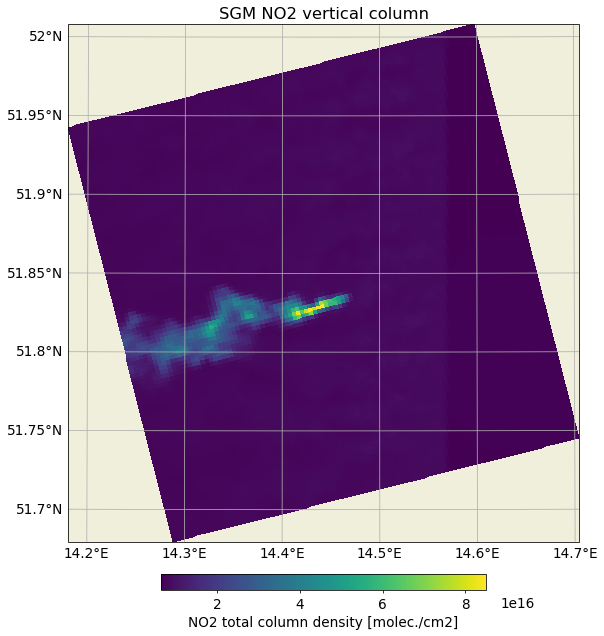

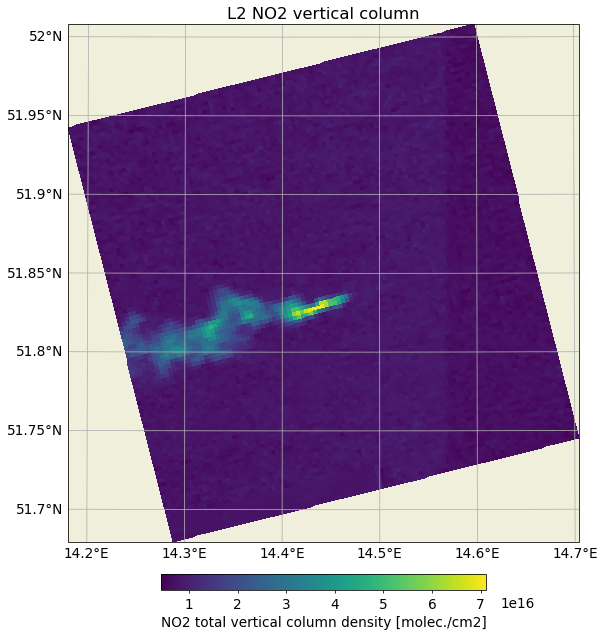

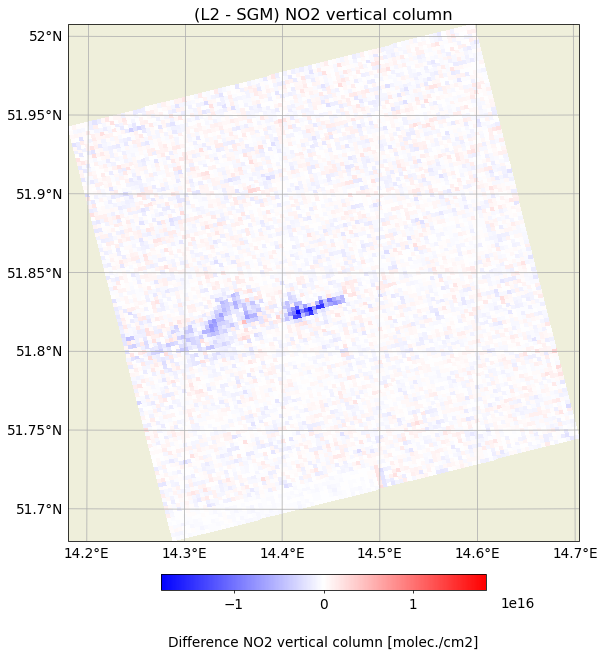

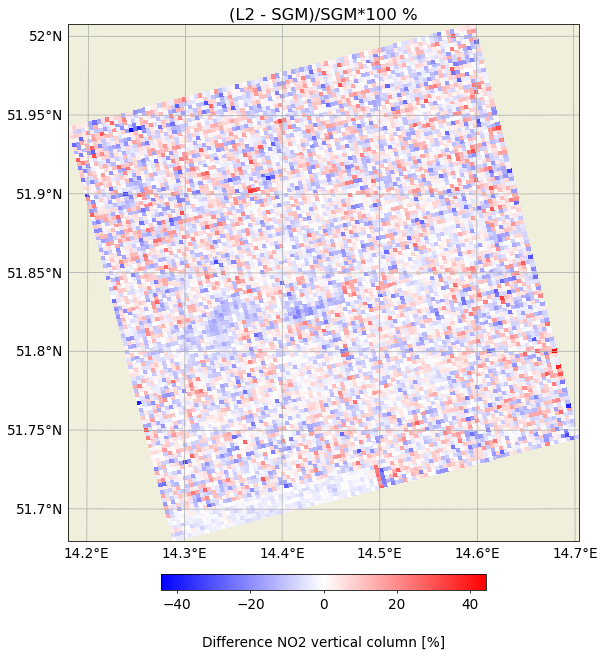

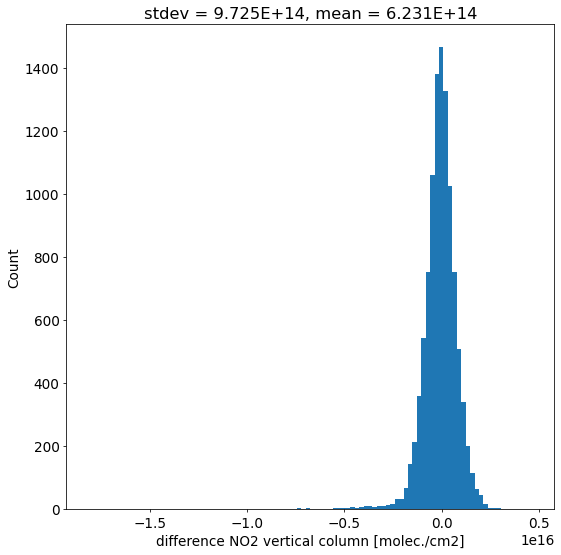

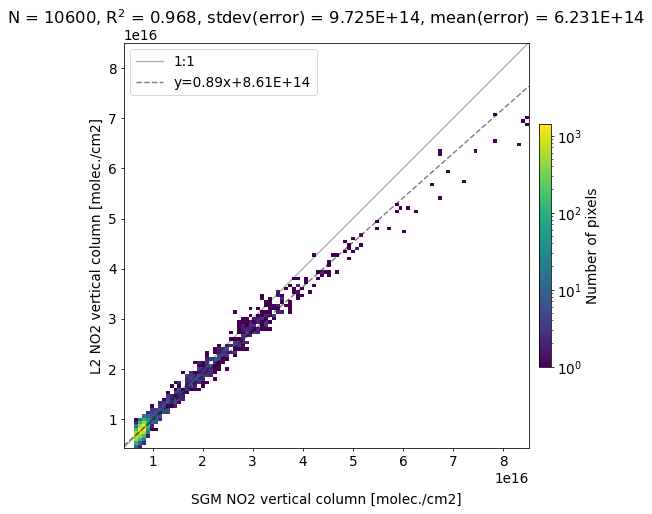

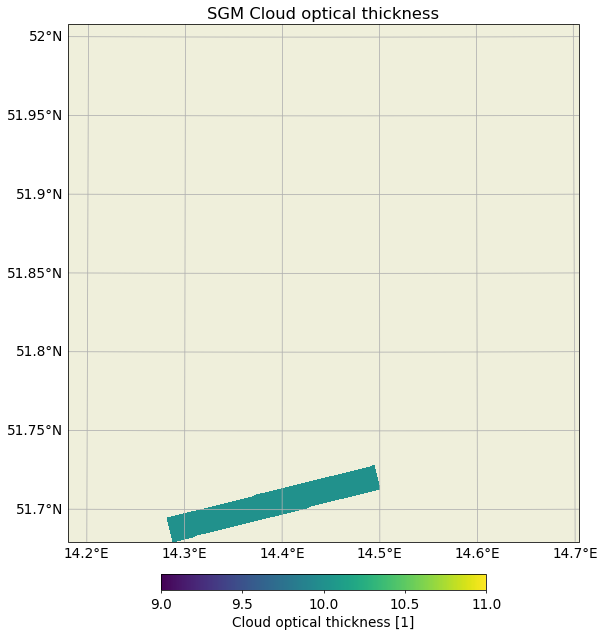

/net/pc230061/nobackup/users/leune/venv/tango/lib64/python3.12/site-packages/matplotlib/colors.py:744: RuntimeWarning: overflow encountered in multiply
  xa *= self.N
/net/pc230061/nobackup/users/leune/venv/tango/lib64/python3.12/site-packages/matplotlib/colors.py:744: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


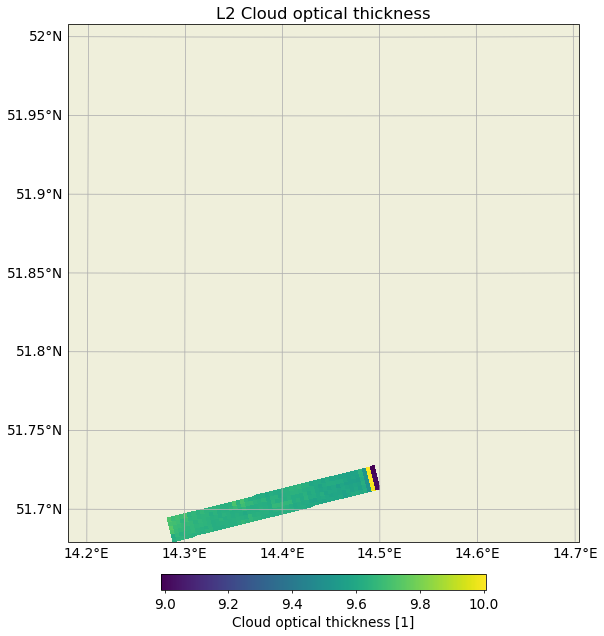

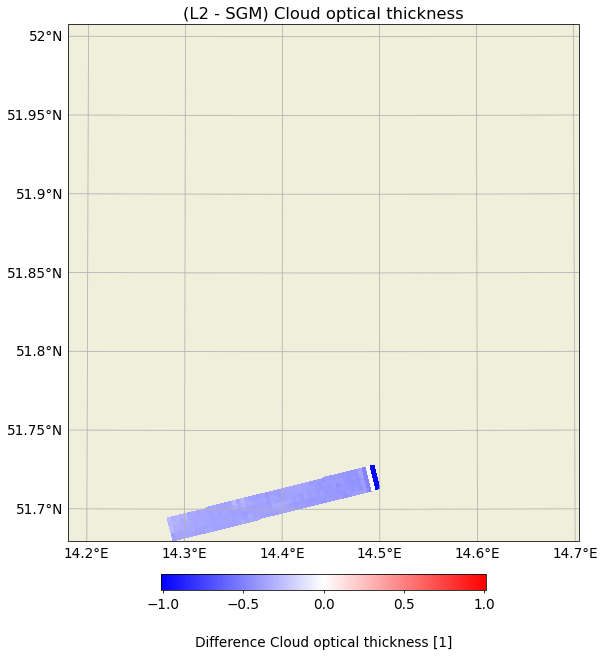

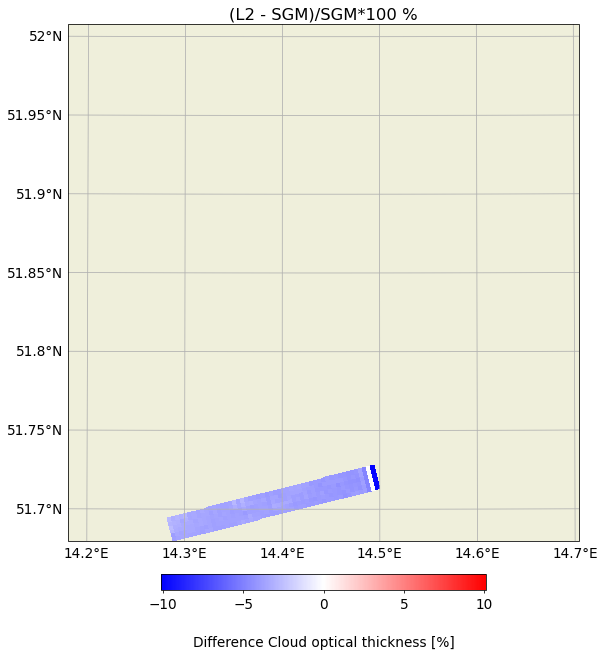

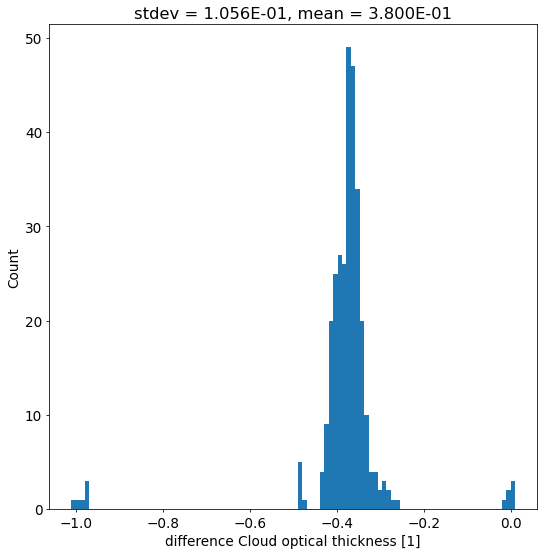

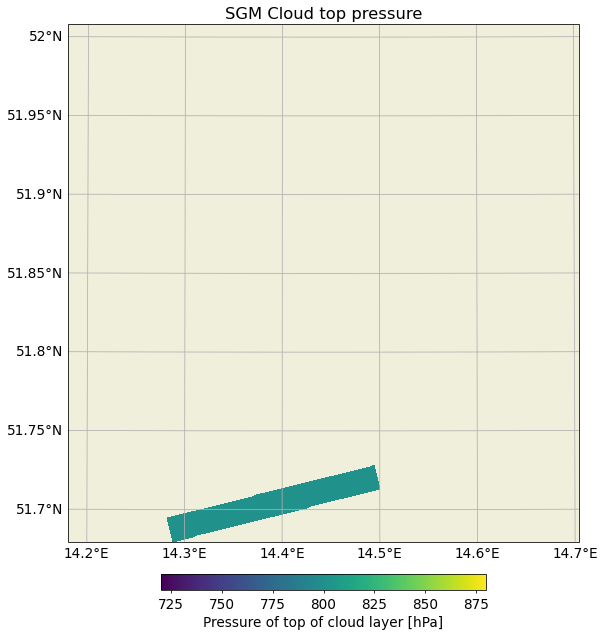

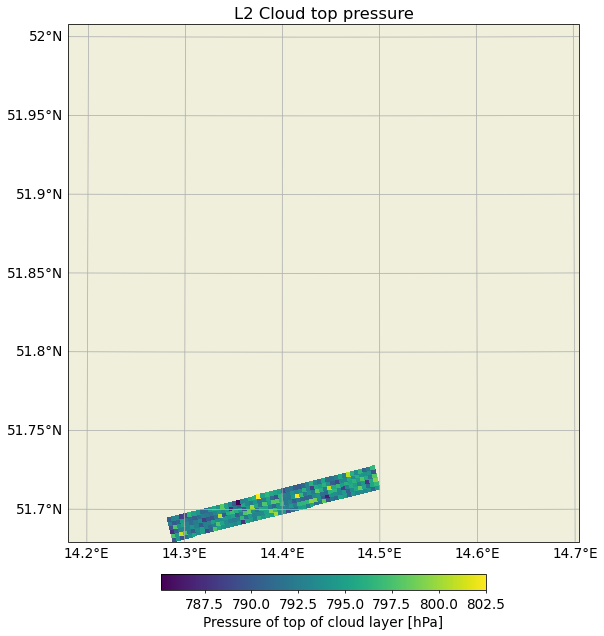

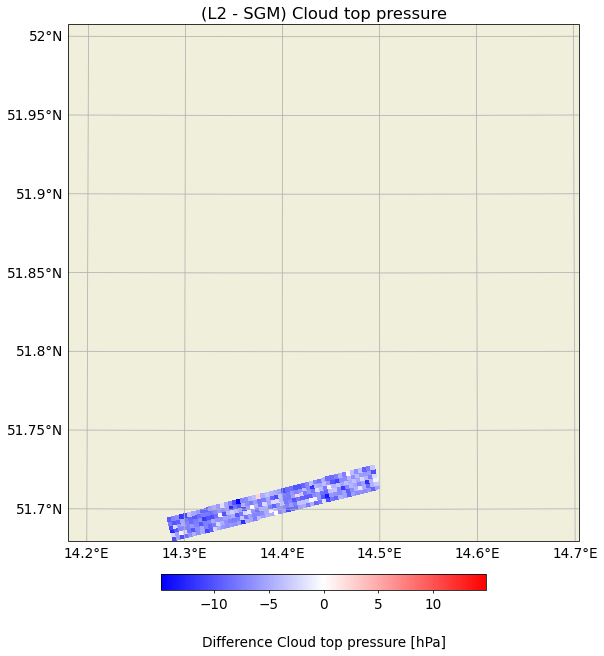

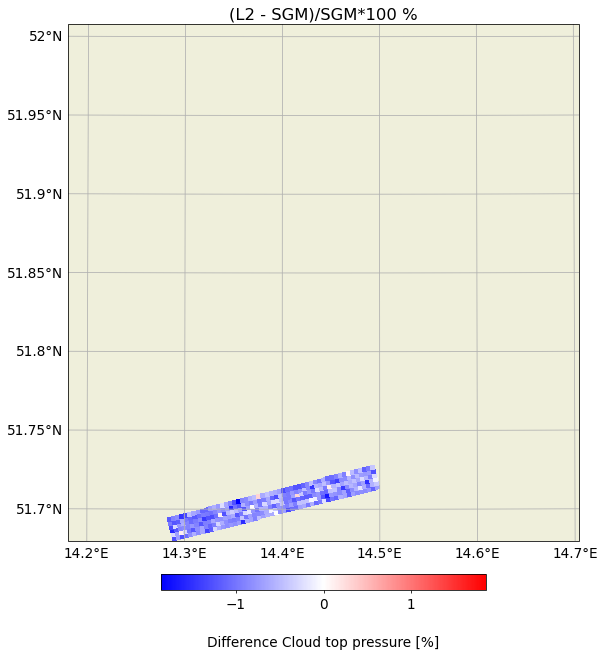

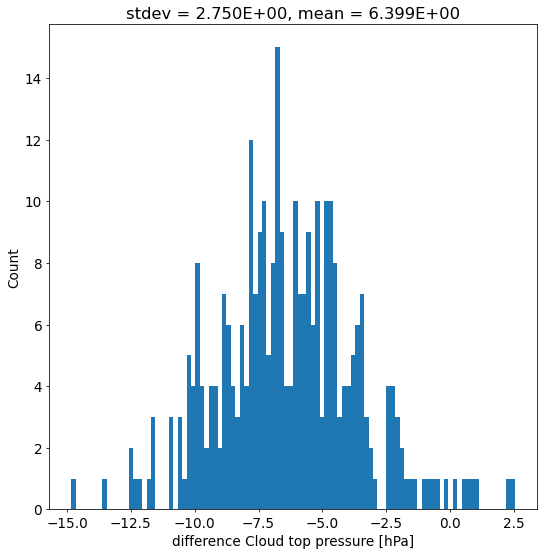

15:25:00 : teds : pam: INFO : Finished PAM


In [4]:
cfg_l2_pam = copy.deepcopy(run_E2E.get_specific_config(cfg,'pam'))
cfg_l2_pam['l2']['run'] = True
pam_nitro(cfg_l2_pam)

## 10. <a id='toc10_'></a>[Conclusions](#toc0_)
- TANGO E2ES Nitro has been demonstrated on a full test scene.

- All E2ES modules can be ran live inside the notebook (note that SGM takes a considerate amount of time).

- Online generation of CKD allows for doing sensitivity tests using CKD parameters.

- Examples of PAM functionality, routines can be easily tailered to each use case.